In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt

In [61]:
def value_iteration_for_gamblers(p_h, theta=0.000001, discount_factor=1.0):
    rewards = np.zeros(101)
    rewards[100] = 1 
    
    V = np.zeros(101)
    
    while True:
        delta = 0
        policy = np.zeros(100)
        for s in range(1, 100):
            A = np.zeros(101)
            stakes = range(1, min(s, 100-s)+1) # Your minimum bet is 1, maximum bet is min(s, 100-s).
            for a in stakes:
                A[a] = p_h * (rewards[s+a] + V[s+a]*discount_factor) + (1-p_h) * (rewards[s-a] + V[s-a]*discount_factor)
            best_action_value = np.max(A)
            delta = max(delta, np.abs(best_action_value - V[s])) 
            V[s] = best_action_value
            best_action = np.argmax(A)
            policy[s] = best_action
        if delta < theta:
            break
    
    return policy, V

In [62]:
policy, v = value_iteration_for_gamblers(0.4)

print("Optimized Policy:")
print(policy)
print("")

print("Optimized Value Function:")
print(v)
print("")

Optimized Policy:
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11. 10. 16.  8.
 18.  6. 20.  4. 22.  2.  1. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.
 14. 12. 12. 11. 10.  9.  8.  7.  6.  5.  4.  3.  2.  1. 50. 49.  2. 47.
  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 36. 10.  9.  8.  7.  6.  5.  4.
  3.  2.  1. 25.  1.  2.  3.  4.  5.  6. 18.  8.  9. 10. 11. 12. 12. 11.
 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.]

Optimized Value Function:
[0.         0.00206557 0.00516406 0.00922541 0.01291015 0.01738534
 0.02306366 0.02781405 0.03227537 0.037685   0.04346347 0.05035439
 0.05765916 0.06523934 0.06953525 0.0744312  0.08068843 0.086611
 0.09421263 0.10314361 0.10865872 0.1159666  0.12588616 0.13357996
 0.14414798 0.16       0.16309844 0.16774609 0.1738382  0.17936522
 0.18607808 0.19459549 0.20172115 0.20841306 0.21652758 0.22519523
 0.2355317  0.24648879 0.25785906 0.26430292 0.27164685 0.28103269
 0.28991655 0.30131902 0.31471544 0.32298811 0.33394993 0.34882926
 0.36036996 0.

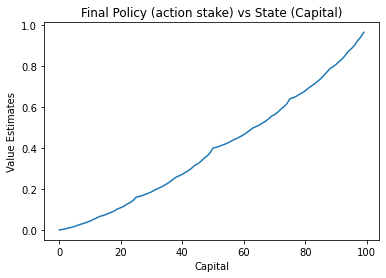

In [37]:
# Plotting Final Policy (action stake) vs State (Capital)

# x axis values
x = range(100)
# corresponding y axis values
y = v[:100]
 
# plotting the points 
plt.plot(x, y)
 
# naming the x axis
plt.xlabel('Capital')
# naming the y axis
plt.ylabel('Value Estimates')
 
# giving a title to the graph
plt.title('Final Policy (action stake) vs State (Capital)')
 
# function to show the plot
plt.show()

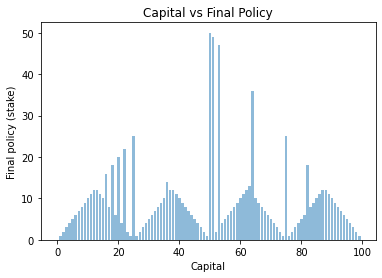

In [63]:
# Plotting Capital vs Final Policy

# x axis values
x = range(100)
# corresponding y axis values
y = policy
 
# plotting the bars
plt.bar(x, y, align='center', alpha=0.5)
 
# naming the x axis
plt.xlabel('Capital')
# naming the y axis
plt.ylabel('Final policy (stake)')
 
# giving a title to the graph
plt.title('Capital vs Final Policy')
 
# function to show the plot
plt.show()